# Homework 5 Dimensionality Reduction and Clustering

In this assignment, we are to use the image data from the MNIST dataset, which is a dataset of 70,000 handwritten numbers that are 28 by 28 pixels (or 784 pixels in total). The assignment description is broken down into four main sections:
1. PCA
2. t-SNE
3. K-means clustering
4. Hierarchical clustering

Each of the above methods are used to gain insights into the dataset, and to demonstrate the various techniques associated with dimensionality reduction and clustering.

In [1]:
# Data structures and manipulation
import pandas as pd
import numpy as np

# PCA, t-SNE, and clustering algorithms
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Silence Deprication Warnings
import warnings
warnings.filterwarnings("ignore")

So, first we have to read in the data, and check to see how many observations we have to deal with.

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X.shape

(70000, 784)

As stated above, the dataset has 70,000 handwritten numbers in 28x28 pixels, or 784 pixels per number. These pixels are recorded as how dark each pixel is, from 0 (totally white) to 255 (totally black).

In [3]:
X_df = pd.DataFrame(X)

In [4]:
pd.options.display.max_columns = 150
X_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,...,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,184.0,252.0,170.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
head_transposed = X_df.head().transpose()
head_transposed.describe()

,0,1,2,3,4
count,784.000000,784.000000,784.000000,784.000000,784.000000
mean,35.108418,39.661990,24.799745,21.855867,29.609694
std,79.699674,83.940709,65.621613,66.121069,74.418792
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000


If we want, we can take a look and see what a random digit looks like when reconstructed.

4511


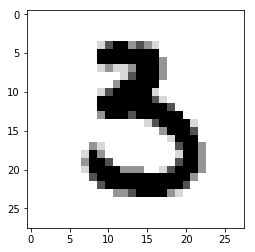

In [6]:
import random
random_digit = random.randint(1,70001)
print(random_digit)
plt.imshow(X[random_digit].reshape((28,28)), cmap='Greys')

## 1. PCA
Next, we can actually move on to the principle component analysis (PCA) of our data, and try and reduce the number of dimensions while still maintaining as much variation as possible.

Right now, our data is in 784 dimensions. To try to figure out how many PCA components to use, I am going to plot what is called a scree plot to try to compare how much variation is maintained with each component. Then, we can look at a cumulative variation graph to see how many we need to maintain different levels of variation.

First, however, we need to scale our data. I know that Tyler said in his lecture notes that the PCA function in SKLearn will automatically re-center the data (i.e. subtract off the mean), but there are a few resources online, [including the SKLearn documentation, that suggest that you should still re-scale the data before applying PCA.](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html) So, that is what I am going to do here before moving forward.

In [7]:
scaler = StandardScaler()
X_dfscaled = X_df.copy()
scaler.fit(X_dfscaled)
X_dfscaled = pd.DataFrame(scaler.transform(X_dfscaled))
X_dfscaled.head().transpose().describe()

,0,1,2,3,4
count,784.000000,784.000000,784.000000,784.000000,784.000000
mean,0.051822,0.038929,0.099625,-0.148891,-0.049890
std,1.114111,0.715957,1.705986,0.569547,0.762699
min,-1.124356,-1.277869,-1.230855,-1.230855,-1.108540
25%,-0.312350,-0.266786,-0.463146,-0.438129,-0.367667
50%,-0.057842,-0.050427,-0.083761,-0.104393,-0.078079
75%,-0.003780,0.000000,-0.005116,-0.008132,-0.005339
max,15.086421,2.660944,17.729202,2.882948,11.214873


In [8]:
pca = PCA()
X_allPCA = pca.fit_transform(X_dfscaled)

Text(0.5,0,'Principle Components by Number')

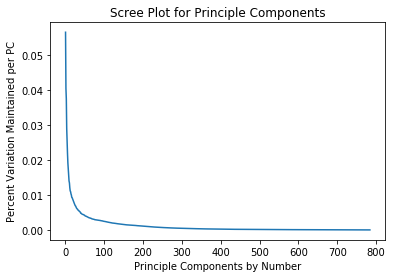

In [33]:
plt.plot(range(1,785),pca.explained_variance_ratio_)
plt.title("Scree Plot for Principle Components")
plt.ylabel("Percent Variation Maintained per PC")
plt.xlabel("Principle Components by Number")

Here, we can see that the first few components maintain the most variation across the possible number of PCs used. Often, a scree plot can help you decide how many PCs to include. Unfortunately, in this case even the first PC maintains only around 5% of the variation, and so it is hard to determine what number is optimal. Instead, let's look at a graph of the cumulative percent of variation maintained as we include more components.

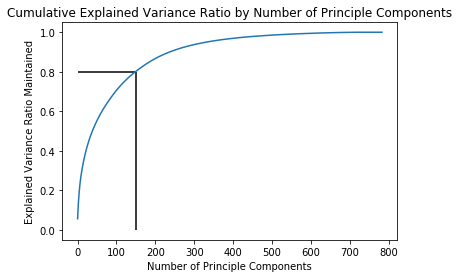

In [38]:
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.title("Cumulative Explained Variance Ratio by Number of Principle Components")
plt.ylabel("Explained Variance Ratio Maintained")
plt.xlabel("Number of Principle Components")
plt.hlines(xmin=0, xmax=150, y=.8)
plt.vlines(ymin=0, ymax=.8, x=150)

Now, we can get a feel for how many PC's we need in order to maintain different levels of explained variance. As shown on the graph, you need roughly 150 components in order to maintain 80% of the variation. This isn't exact, however. Instead, we can look at the actual function and find the precise level of explained variance at particular numbers of components, and vice versa. Let's check to see how many components we need for 85% explained variance being maintained.

In [41]:
index_85 = np.argmax(cum_ratio >= 0.85)
print(index_85)
print(cum_ratio[index_85])

185
0.8501423243663397


Wow, so it looks like we can maintain 85% of the variation with only 186 components. Let's check for 95%.

In [40]:
index_95 = np.argmax(cum_ratio >= 0.95)
print(index_95)
print(cum_ratio[index_95])

331
0.9500311796713791


So, in order to increase the maintained explained variance by 10 percentage points, we'd need to go all the way from 186 components to 332 components, which is a nearly 78% increase in the number of components needed. For our purposes, let's stick with the 85% variation, with 186 components.

In [9]:
pca = PCA(n_components=186)
X_pca = pca.fit_transform(X_dfscaled)

We can take a look at the first two components graphed together.

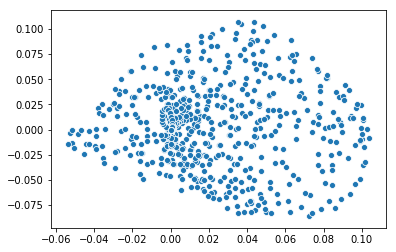

In [56]:
sns.scatterplot(pca.components_[0], pca.components_[1])

With just the first two components, we can't clearly see any trend that helps us distinguish between digits. However, it does help us at least consider how the data is spread out, even if we can only see in two dimensions.

PCA helps us to reduce the number of features by collapsing some of the dimensions in our data. One way this helps is by speeding up the modeling process because there are fewer features to deal with. However, a primary way this can help in modeling is that we can preserve the variation among the data, but with fewer features, thereby helping to avoid the problem of overfitting. This can help dramatically improve the accuracy (and/or recall, precision, F1, etc.) of a classification model.

However, this added improvement to the model comes at the cost of interpretability. We can no longer just say, "which feature(s) are most important to the model?" in a way that makes sense. Sure, we can name off the components that help the most, but what are those components? They are the vectors that best fit the data as to maximize the amount of variation per each component, with each new component being orthogonal to the one(s) before it. Ok, but what does that mean? Well, it's hard to really say. So, being able to use the improved model to better understand the mechanisms behind the predictions is not great when using PCA.

Another use for PCA is to compress data, or images. In fact, if you have as many components as you have original features, you can entirely reconstruct your original data from those components. Most of the time, however, you have less features, since the point of PCA is to reduce the number of dimensions. In our case, this has the result of maintaining the general form and variation of an image, but without the same amount of clarity. Let's look at the same image, but before and after PCA.

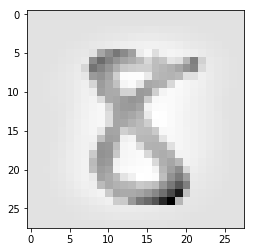

In [57]:
pre_X = X_dfscaled.values
plt.imshow(pre_X[64789].reshape((28,28)), cmap='Greys')

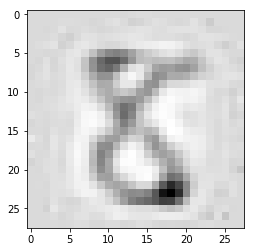

In [58]:
post_X = pca.inverse_transform(X_pca)
plt.imshow(post_X[64789].reshape((28,28)), cmap='Greys')

We can clearly see that even with only 186 components (only 24% of the possible number of components) and 85% of the variation, we can still clearly make out the number 8 in the image! Let's look at another one.

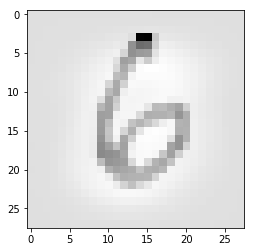

In [61]:
plt.imshow(pre_X[42700].reshape((28,28)), cmap='Greys')

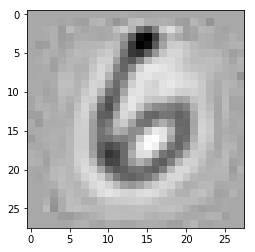

In [62]:
plt.imshow(post_X[42700].reshape((28,28)), cmap='Greys')

We can clearly see that the number is still legible.

## 2. t-SNE

Using t-SNE, we can get an even better look at what data are closer together or farther apart in higher dimensions, but represented in only two dimensions.

In [9]:
#first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_dfscaled)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

In [11]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.036s...
[t-SNE] Computed neighbors for 10000 samples in 8.479s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 4.121569
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.962700
[t-SNE] KL divergence after 1000 iterations: 1.601778


In [12]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

Text(0.5,1,'Principle Components of MNIST Digits using t-SNE')

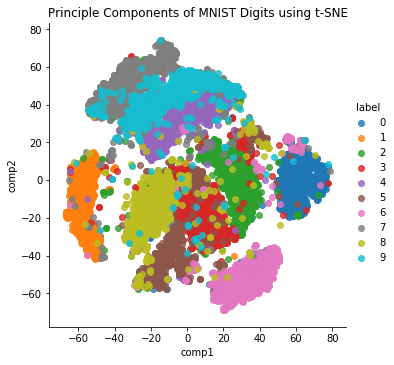

In [68]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
ax = plt.gca()
ax.set_title("Principle Components of MNIST Digits using t-SNE")

t-SNE is very sensitive to changes in its hyperparameters, such as perplexity, learning rate, and number of iterations, and can lead to a very different looking (or useless) picture. Let's adjust each of these, and see what we get.

The recommended range for perplexity is [5 to 50](https://distill.pub/2016/misread-tsne/), and is never supposed to be more than the number of components you're dealing with. Let's ramp it up to 100, and see what happens.

In [69]:
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.028s...
[t-SNE] Computed neighbors for 10000 samples in 9.212s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 4.858902
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.531357
[t-SNE] KL divergence after 1000 iterations: 1.450336


Text(0.5,1,'Principle Components of MNIST Digits using t-SNE - Perplexity=100')

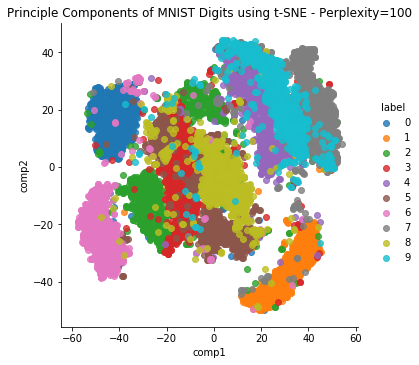

In [70]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
ax = plt.gca()
ax.set_title("Principle Components of MNIST Digits using t-SNE - Perplexity=100")

Wow, surprisingly we can still see clearly the distinct groups. Let's try a low perplexity of 2.

In [71]:
tsne = TSNE(n_components=2, verbose=1, perplexity=2, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.025s...
[t-SNE] Computed neighbors for 10000 samples in 6.891s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.405619
[t-SNE] KL divergence after 250 iterations with early exaggeration: 99.984283
[t-SNE] KL divergence after 1000 iterations: 1.882501


Text(0.5,1,'Principle Components of MNIST Digits using t-SNE - Perplexity=2')

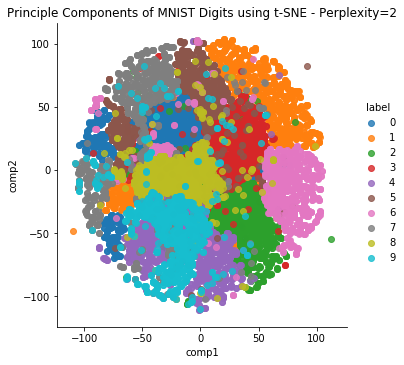

In [72]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
ax = plt.gca()
ax.set_title("Principle Components of MNIST Digits using t-SNE - Perplexity=2")

Aha, now we can see that the clusters are much more mixed and jumbled, with less distinction and distance between them. Let's try now again with a perplexity of 50, but change the number of iterations down to a level before it might have a chance to stabilize. Let's say around 250 (I wanted to try lower, but sklearn's t-SNE requires at least 250).

In [74]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=250, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.027s...
[t-SNE] Computed neighbors for 10000 samples in 8.955s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 4.208059
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.990303
[t-SNE] KL divergence after 251 iterations: 1797693134862315708145274237317043

Text(0.5,1,'Principle Components of MNIST Digits using t-SNE - Iterations = 250')

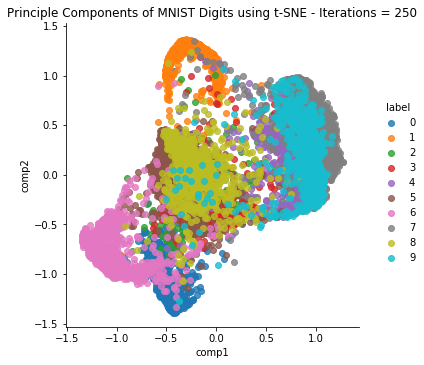

In [75]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
ax = plt.gca()
ax.set_title("Principle Components of MNIST Digits using t-SNE - Iterations = 250")

Isn't that an interesting shape? It looks very different from what we've seen so far, but also clearly hasn't stabilized in dividing up the possible clusters. Let's mess with the learning rate now, increasing it to 500 (while putting iterations back to 1000).

In [76]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=500)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.023s...
[t-SNE] Computed neighbors for 10000 samples in 9.112s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 4.208059
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.988243
[t-SNE] KL divergence after 1000 iterations: 1.592368


Text(0.5,1,'Principle Components of MNIST Digits using t-SNE - Learning Rate = 500')

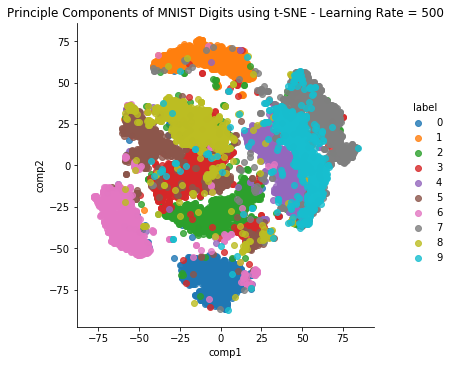

In [79]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
ax = plt.gca()
ax.set_title("Principle Components of MNIST Digits using t-SNE - Learning Rate = 500")

I figured that a significantly larger learning rate might make stabilization more difficult, but it appears to be about as stable and distinct as the first one we ran. So, you could say that the t-SNE components are quite robust to some changes, but that it is important to run a few different values to get a feel for what the common stable result looks like.

### 3. K-means Clustering

So, with the MNIST dataset, we already know that there are 10 digits represented in the data (numerals 0 to 9). However, in some settings, the data isn't labeled, or we are unsure of how many groups or segments we are dealing with. For example, maybe a business has tons of data on their customers, but they don't know how best to break down the grouping of their customers in order to advertise or provide new services to each demographic.

Using K-means clustering, we can attempt to determine which observations are most like other observations, and attempt to put them into clusters, based on how "far" the points are from each other on average (hence, the means in "K-means"). This is easier to conceptualize in just two dimensions, but K-means allows us to deal with it in many dimensions.

Let's assume, for right now, that we don't know how many naturally occuring clusters there are in our data. How would we choose the number of clusters to try to divide our data into (i.e. what k should we use)? One method is to try out different numbers for K, and plot them with their sum squared distances. We then use the *elbow method* to pick a good choice for k. This isn't entirely exact, as is more of a rule of thumb, but if you don't have any other way of determining the best k to choose, it can point you in the right direction.

Note: I tried running the entire scaled dataframe through KMeans, and it ran for nearly an hour before I stopped it. I decided to try the PCA-reduced variables instead.

Second note: Even with only 50 components, it appeared that running a whole bunch of KMeans in order to plot and find an elbow was also taking too much time. For now, I will run it once, and choose a k of 10 since I already know that is the number of digits in the data. Yay domain knowledge!

Third note: Also, I didn't use a smaller sample for the KMeans, which means I can't plot it directly on my previous t-SNE results, but I can build a similar graph using the first two components from PCA. If I had enough time to go back, I would redo the KMeans with the t-SNE components instead, and then graph it all up together.

In [13]:
kmeans = KMeans(n_clusters=10, n_init=50, n_jobs=-1, verbose=1)
kmeans.fit(X_pca)
sk_clusters = kmeans.predict(X_pca)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 21816489.666973293
start iteration
done sorting
end inner loop
Iteration 1, inertia 20941317.720052753
start iteration
done sorting
end inner loop
Iteration 2, inertia 20603749.98948227
start iteration
done sorting
end inner loop
Iteration 3, inertia 20358704.144946072
start iteration
done sorting
end inner loop
Iteration 4, inertia 20221154.08131863
start iteration
done sorting
end inner loop
Iteration 5, inertia 20134060.699196097
start iteration
done sorting
end inner loop
Iteration 6, inertia 20076370.915863127
start iteration
done sorting
end inner loop
Iteration 7, inertia 20041703.006652992
start iteration
done sorting
end inner loop
Iteration 8, inertia 20020390.53645839
start iteration
done sorting
end inner loop
Iteration 9, inertia 20005367.56938853
start iteration
done sorting
end inner loop
Iteration 10, inertia 19992505.167514674
start iteration
done sorting
end inner loop
Iteration 1

Iteration 24, inertia 19918086.08851152
start iteration
done sorting
end inner loop
Iteration 25, inertia 19916975.446859516
start iteration
done sorting
end inner loop
Iteration 26, inertia 19916071.77215645
start iteration
done sorting
end inner loop
Iteration 27, inertia 19915384.953373294
start iteration
done sorting
end inner loop
Iteration 28, inertia 19914853.639681026
start iteration
done sorting
end inner loop
Iteration 29, inertia 19914492.162280645
start iteration
done sorting
end inner loop
Iteration 30, inertia 19914188.13834737
start iteration
done sorting
end inner loop
Iteration 31, inertia 19913934.960144527
start iteration
done sorting
end inner loop
Iteration 32, inertia 19913788.478520125
start iteration
done sorting
end inner loop
Iteration 33, inertia 19913706.124501973
start iteration
done sorting
end inner loop
Iteration 34, inertia 19913641.687721077
start iteration
done sorting
end inner loop
Iteration 35, inertia 19913590.87343652
start iteration
done sorting

Iteration 56, inertia 19914395.169411704
start iteration
done sorting
end inner loop
Iteration 57, inertia 19914369.566096943
start iteration
done sorting
end inner loop
Iteration 58, inertia 19914356.45395383
start iteration
done sorting
end inner loop
Iteration 59, inertia 19914348.46156644
start iteration
done sorting
end inner loop
Iteration 60, inertia 19914345.545528058
start iteration
done sorting
end inner loop
Iteration 61, inertia 19914344.621185035
start iteration
done sorting
end inner loop
Iteration 62, inertia 19914344.052153688
center shift 1.925511e-02 within tolerance 7.895565e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 21706409.826122787
start iteration
done sorting
end inner loop
Iteration 1, inertia 20834808.59975632
start iteration
done sorting
end inner loop
Iteration 2, inertia 20615098.77072625
start iteration
done sorting
end inner loop
Iteration 3, inertia 20427722.292901028
start iteration
done sorting
end inne

Iteration 16, inertia 20117971.25750138
start iteration
done sorting
end inner loop
Iteration 17, inertia 20108459.41265992
start iteration
done sorting
end inner loop
Iteration 18, inertia 20100974.836195473
start iteration
done sorting
end inner loop
Iteration 19, inertia 20094875.985823765
start iteration
done sorting
end inner loop
Iteration 20, inertia 20089833.57157678
start iteration
done sorting
end inner loop
Iteration 21, inertia 20085647.340859227
start iteration
done sorting
end inner loop
Iteration 22, inertia 20081457.344637953
start iteration
done sorting
end inner loop
Iteration 23, inertia 20076968.10968133
start iteration
done sorting
end inner loop
Iteration 24, inertia 20072140.148074716
start iteration
done sorting
end inner loop
Iteration 25, inertia 20066574.68632596
start iteration
done sorting
end inner loop
Iteration 26, inertia 20059057.456002813
start iteration
done sorting
end inner loop
Iteration 27, inertia 20049268.989328988
start iteration
done sorting


Iteration 43, inertia 20029002.13029149
start iteration
done sorting
end inner loop
Iteration 44, inertia 20012384.5571144
start iteration
done sorting
end inner loop
Iteration 45, inertia 19994008.394930176
start iteration
done sorting
end inner loop
Iteration 46, inertia 19975187.091102865
start iteration
done sorting
end inner loop
Iteration 47, inertia 19957926.18780294
start iteration
done sorting
end inner loop
Iteration 48, inertia 19941463.299801294
start iteration
done sorting
end inner loop
Iteration 49, inertia 19930012.211204663
start iteration
done sorting
end inner loop
Iteration 50, inertia 19922943.97701776
start iteration
done sorting
end inner loop
Iteration 51, inertia 19919322.522537656
start iteration
done sorting
end inner loop
Iteration 52, inertia 19917534.674000286
start iteration
done sorting
end inner loop
Iteration 53, inertia 19916707.04009889
start iteration
done sorting
end inner loop
Iteration 54, inertia 19916146.337319106
start iteration
done sorting
e

Iteration 10, inertia 20189303.793466285
start iteration
done sorting
end inner loop
Iteration 11, inertia 20151463.48726283
start iteration
done sorting
end inner loop
Iteration 12, inertia 20114379.13465887
start iteration
done sorting
end inner loop
Iteration 13, inertia 20084182.3074311
start iteration
done sorting
end inner loop
Iteration 14, inertia 20058053.546285294
start iteration
done sorting
end inner loop
Iteration 15, inertia 20038057.872433987
start iteration
done sorting
end inner loop
Iteration 16, inertia 20025090.458189715
start iteration
done sorting
end inner loop
Iteration 17, inertia 20016313.251465075
start iteration
done sorting
end inner loop
Iteration 18, inertia 20009457.964981016
start iteration
done sorting
end inner loop
Iteration 19, inertia 20004360.90360907
start iteration
done sorting
end inner loop
Iteration 20, inertia 20000667.224479295
start iteration
done sorting
end inner loop
Iteration 21, inertia 19997842.733393993
start iteration
done sorting


Iteration 16, inertia 20008277.284516554
start iteration
done sorting
end inner loop
Iteration 17, inertia 20007141.06585959
start iteration
done sorting
end inner loop
Iteration 18, inertia 20006054.44094027
start iteration
done sorting
end inner loop
Iteration 19, inertia 20005083.77051103
start iteration
done sorting
end inner loop
Iteration 20, inertia 20004405.189185034
start iteration
done sorting
end inner loop
Iteration 21, inertia 20003808.957330573
start iteration
done sorting
end inner loop
Iteration 22, inertia 20003310.371384766
start iteration
done sorting
end inner loop
Iteration 23, inertia 20002851.650506683
start iteration
done sorting
end inner loop
Iteration 24, inertia 20002429.27272135
start iteration
done sorting
end inner loop
Iteration 25, inertia 20002032.929102197
start iteration
done sorting
end inner loop
Iteration 26, inertia 20001656.970579278
start iteration
done sorting
end inner loop
Iteration 27, inertia 20001298.25832592
start iteration
done sorting


Iteration 113, inertia 19983420.839995746
start iteration
done sorting
end inner loop
Iteration 114, inertia 19983102.769341107
start iteration
done sorting
end inner loop
Iteration 115, inertia 19982855.156279273
start iteration
done sorting
end inner loop
Iteration 116, inertia 19982623.278445836
start iteration
done sorting
end inner loop
Iteration 117, inertia 19982371.194254693
start iteration
done sorting
end inner loop
Iteration 118, inertia 19982108.757832468
start iteration
done sorting
end inner loop
Iteration 119, inertia 19981773.341774523
start iteration
done sorting
end inner loop
Iteration 120, inertia 19981362.520676807
start iteration
done sorting
end inner loop
Iteration 121, inertia 19980937.099150866
start iteration
done sorting
end inner loop
Iteration 122, inertia 19980581.640232682
start iteration
done sorting
end inner loop
Iteration 123, inertia 19980305.422515128
start iteration
done sorting
end inner loop
Iteration 124, inertia 19979998.71691097
start iterati

Iteration 48, inertia 20028305.710242312
start iteration
done sorting
end inner loop
Iteration 49, inertia 20028112.870215464
start iteration
done sorting
end inner loop
Iteration 50, inertia 20027901.03823017
start iteration
done sorting
end inner loop
Iteration 51, inertia 20027731.73810724
start iteration
done sorting
end inner loop
Iteration 52, inertia 20027625.473663863
start iteration
done sorting
end inner loop
Iteration 53, inertia 20027544.919031113
start iteration
done sorting
end inner loop
Iteration 54, inertia 20027470.910729717
start iteration
done sorting
end inner loop
Iteration 55, inertia 20027399.91850084
start iteration
done sorting
end inner loop
Iteration 56, inertia 20027328.25155682
start iteration
done sorting
end inner loop
Iteration 57, inertia 20027270.51247216
start iteration
done sorting
end inner loop
Iteration 58, inertia 20027213.865815394
start iteration
done sorting
end inner loop
Iteration 59, inertia 20027135.54031449
start iteration
done sorting
e

Iteration 8, inertia 20113884.958699003
start iteration
done sorting
end inner loop
Iteration 9, inertia 20076328.434101965
start iteration
done sorting
end inner loop
Iteration 10, inertia 20056069.86725299
start iteration
done sorting
end inner loop
Iteration 11, inertia 20043121.479814164
start iteration
done sorting
end inner loop
Iteration 12, inertia 20032894.86084151
start iteration
done sorting
end inner loop
Iteration 13, inertia 20024190.51813782
start iteration
done sorting
end inner loop
Iteration 14, inertia 20017449.848071717
start iteration
done sorting
end inner loop
Iteration 15, inertia 20012329.15136313
start iteration
done sorting
end inner loop
Iteration 16, inertia 20008998.64267234
start iteration
done sorting
end inner loop
Iteration 17, inertia 20006617.022434868
start iteration
done sorting
end inner loop
Iteration 18, inertia 20004842.590291664
start iteration
done sorting
end inner loop
Iteration 19, inertia 20003363.33299524
start iteration
done sorting
end

Iteration 107, inertia 19982048.36679708
start iteration
done sorting
end inner loop
Iteration 108, inertia 19982014.145233266
start iteration
done sorting
end inner loop
Iteration 109, inertia 19981977.262976144
start iteration
done sorting
end inner loop
Iteration 110, inertia 19981944.03984849
start iteration
done sorting
end inner loop
Iteration 111, inertia 19981905.201351337
start iteration
done sorting
end inner loop
Iteration 112, inertia 19981867.745716687
start iteration
done sorting
end inner loop
Iteration 113, inertia 19981828.29362456
start iteration
done sorting
end inner loop
Iteration 114, inertia 19981792.167743914
start iteration
done sorting
end inner loop
Iteration 115, inertia 19981747.651231285
start iteration
done sorting
end inner loop
Iteration 116, inertia 19981715.00451751
start iteration
done sorting
end inner loop
Iteration 117, inertia 19981682.389752194
start iteration
done sorting
end inner loop
Iteration 118, inertia 19981647.484509174
start iteration


Iteration 204, inertia 19972056.761422124
start iteration
done sorting
end inner loop
Iteration 205, inertia 19971993.025143463
start iteration
done sorting
end inner loop
Iteration 206, inertia 19971925.68110074
start iteration
done sorting
end inner loop
Iteration 207, inertia 19971882.4506455
start iteration
done sorting
end inner loop
Iteration 208, inertia 19971848.70776351
start iteration
done sorting
end inner loop
Iteration 209, inertia 19971806.833663568
start iteration
done sorting
end inner loop
Iteration 210, inertia 19971741.343409043
start iteration
done sorting
end inner loop
Iteration 211, inertia 19971683.790492292
start iteration
done sorting
end inner loop
Iteration 212, inertia 19971653.136795186
start iteration
done sorting
end inner loop
Iteration 213, inertia 19971620.093192924
start iteration
done sorting
end inner loop
Iteration 214, inertia 19971598.80293645
start iteration
done sorting
end inner loop
Iteration 215, inertia 19971587.90883867
start iteration
do

Iteration 4, inertia 20202961.329024784
start iteration
done sorting
end inner loop
Iteration 5, inertia 20152395.013376083
start iteration
done sorting
end inner loop
Iteration 6, inertia 20122799.2294544
start iteration
done sorting
end inner loop
Iteration 7, inertia 20101674.446212985
start iteration
done sorting
end inner loop
Iteration 8, inertia 20083110.005961906
start iteration
done sorting
end inner loop
Iteration 9, inertia 20065315.10803239
start iteration
done sorting
end inner loop
Iteration 10, inertia 20044084.83331523
start iteration
done sorting
end inner loop
Iteration 11, inertia 20019609.726442825
start iteration
done sorting
end inner loop
Iteration 12, inertia 19995396.81336872
start iteration
done sorting
end inner loop
Iteration 13, inertia 19972719.851067416
start iteration
done sorting
end inner loop
Iteration 14, inertia 19953205.735919833
start iteration
done sorting
end inner loop
Iteration 15, inertia 19939165.33956808
start iteration
done sorting
end inn

Iteration 28, inertia 20169351.385729086
start iteration
done sorting
end inner loop
Iteration 29, inertia 20168937.57394474
start iteration
done sorting
end inner loop
Iteration 30, inertia 20168528.393622123
start iteration
done sorting
end inner loop
Iteration 31, inertia 20168095.223137952
start iteration
done sorting
end inner loop
Iteration 32, inertia 20167560.935432926
start iteration
done sorting
end inner loop
Iteration 33, inertia 20166909.77209027
start iteration
done sorting
end inner loop
Iteration 34, inertia 20166190.17981246
start iteration
done sorting
end inner loop
Iteration 35, inertia 20165378.452597413
start iteration
done sorting
end inner loop
Iteration 36, inertia 20164275.778750204
start iteration
done sorting
end inner loop
Iteration 37, inertia 20163012.347988047
start iteration
done sorting
end inner loop
Iteration 38, inertia 20161496.686219387
start iteration
done sorting
end inner loop
Iteration 39, inertia 20159633.11490293
start iteration
done sorting

Iteration 37, inertia 19974064.56116949
start iteration
done sorting
end inner loop
Iteration 38, inertia 19973817.17340472
start iteration
done sorting
end inner loop
Iteration 39, inertia 19973492.26251949
start iteration
done sorting
end inner loop
Iteration 40, inertia 19973227.68349232
start iteration
done sorting
end inner loop
Iteration 41, inertia 19973016.01923898
start iteration
done sorting
end inner loop
Iteration 42, inertia 19972862.718431916
start iteration
done sorting
end inner loop
Iteration 43, inertia 19972691.59776099
start iteration
done sorting
end inner loop
Iteration 44, inertia 19972560.960671812
start iteration
done sorting
end inner loop
Iteration 45, inertia 19972452.631273575
start iteration
done sorting
end inner loop
Iteration 46, inertia 19972301.8365751
start iteration
done sorting
end inner loop
Iteration 47, inertia 19972177.237017427
start iteration
done sorting
end inner loop
Iteration 48, inertia 19972016.997078918
start iteration
done sorting
end

Iteration 63, inertia 19976552.017248634
start iteration
done sorting
end inner loop
Iteration 64, inertia 19975862.155361384
start iteration
done sorting
end inner loop
Iteration 65, inertia 19975181.483023003
start iteration
done sorting
end inner loop
Iteration 66, inertia 19974599.299316335
start iteration
done sorting
end inner loop
Iteration 67, inertia 19973992.20109944
start iteration
done sorting
end inner loop
Iteration 68, inertia 19973465.097863313
start iteration
done sorting
end inner loop
Iteration 69, inertia 19973102.598050766
start iteration
done sorting
end inner loop
Iteration 70, inertia 19972827.034574103
start iteration
done sorting
end inner loop
Iteration 71, inertia 19972554.151445575
start iteration
done sorting
end inner loop
Iteration 72, inertia 19972361.184703358
start iteration
done sorting
end inner loop
Iteration 73, inertia 19972200.092824806
start iteration
done sorting
end inner loop
Iteration 74, inertia 19972089.94404158
start iteration
done sorti

Iteration 29, inertia 19995595.286670353
start iteration
done sorting
end inner loop
Iteration 30, inertia 19994771.38494351
start iteration
done sorting
end inner loop
Iteration 31, inertia 19993939.827959806
start iteration
done sorting
end inner loop
Iteration 32, inertia 19993222.481224474
start iteration
done sorting
end inner loop
Iteration 33, inertia 19992559.744784527
start iteration
done sorting
end inner loop
Iteration 34, inertia 19992009.757921692
start iteration
done sorting
end inner loop
Iteration 35, inertia 19991505.170775503
start iteration
done sorting
end inner loop
Iteration 36, inertia 19991017.044165716
start iteration
done sorting
end inner loop
Iteration 37, inertia 19990604.294853754
start iteration
done sorting
end inner loop
Iteration 38, inertia 19990323.285206236
start iteration
done sorting
end inner loop
Iteration 39, inertia 19990008.121991277
start iteration
done sorting
end inner loop
Iteration 40, inertia 19989612.140074532
start iteration
done sort

Iteration 22, inertia 19994283.04601262
start iteration
done sorting
end inner loop
Iteration 23, inertia 19993295.20447823
start iteration
done sorting
end inner loop
Iteration 24, inertia 19992386.239738014
start iteration
done sorting
end inner loop
Iteration 25, inertia 19991605.8065234
start iteration
done sorting
end inner loop
Iteration 26, inertia 19990784.452514235
start iteration
done sorting
end inner loop
Iteration 27, inertia 19990021.024844967
start iteration
done sorting
end inner loop
Iteration 28, inertia 19989251.356093414
start iteration
done sorting
end inner loop
Iteration 29, inertia 19988532.2052551
start iteration
done sorting
end inner loop
Iteration 30, inertia 19987928.152869035
start iteration
done sorting
end inner loop
Iteration 31, inertia 19987372.065066263
start iteration
done sorting
end inner loop
Iteration 32, inertia 19986881.944159117
start iteration
done sorting
end inner loop
Iteration 33, inertia 19986540.13419581
start iteration
done sorting
en

start iteration
done sorting
end inner loop
Iteration 121, inertia 19979292.17263949
start iteration
done sorting
end inner loop
Iteration 122, inertia 19979245.27450511
start iteration
done sorting
end inner loop
Iteration 123, inertia 19979189.681088377
start iteration
done sorting
end inner loop
Iteration 124, inertia 19979121.719992723
start iteration
done sorting
end inner loop
Iteration 125, inertia 19979045.476843506
start iteration
done sorting
end inner loop
Iteration 126, inertia 19978961.765557963
start iteration
done sorting
end inner loop
Iteration 127, inertia 19978843.528881945
start iteration
done sorting
end inner loop
Iteration 128, inertia 19978665.77548055
start iteration
done sorting
end inner loop
Iteration 129, inertia 19978472.943210255
start iteration
done sorting
end inner loop
Iteration 130, inertia 19978254.756988633
start iteration
done sorting
end inner loop
Iteration 131, inertia 19978005.19721924
start iteration
done sorting
end inner loop
Iteration 132,

Iteration 35, inertia 20095950.038421128
start iteration
done sorting
end inner loop
Iteration 36, inertia 20095317.119937498
start iteration
done sorting
end inner loop
Iteration 37, inertia 20094618.94279371
start iteration
done sorting
end inner loop
Iteration 38, inertia 20093842.2955717
start iteration
done sorting
end inner loop
Iteration 39, inertia 20093144.66956299
start iteration
done sorting
end inner loop
Iteration 40, inertia 20092389.12454417
start iteration
done sorting
end inner loop
Iteration 41, inertia 20091687.305760752
start iteration
done sorting
end inner loop
Iteration 42, inertia 20090975.260394894
start iteration
done sorting
end inner loop
Iteration 43, inertia 20090420.02614743
start iteration
done sorting
end inner loop
Iteration 44, inertia 20089917.468071137
start iteration
done sorting
end inner loop
Iteration 45, inertia 20089496.656188697
start iteration
done sorting
end inner loop
Iteration 46, inertia 20089017.24999576
start iteration
done sorting
en

Iteration 47, inertia 20011594.83018549
start iteration
done sorting
end inner loop
Iteration 48, inertia 20010637.76732472
start iteration
done sorting
end inner loop
Iteration 49, inertia 20009576.115379952
start iteration
done sorting
end inner loop
Iteration 50, inertia 20008561.02898926
start iteration
done sorting
end inner loop
Iteration 51, inertia 20007465.484851576
start iteration
done sorting
end inner loop
Iteration 52, inertia 20006416.30782836
start iteration
done sorting
end inner loop
Iteration 53, inertia 20005473.579759933
start iteration
done sorting
end inner loop
Iteration 54, inertia 20004596.862661857
start iteration
done sorting
end inner loop
Iteration 55, inertia 20003634.390767176
start iteration
done sorting
end inner loop
Iteration 56, inertia 20002896.8290043
start iteration
done sorting
end inner loop
Iteration 57, inertia 20002025.601448163
start iteration
done sorting
end inner loop
Iteration 58, inertia 20001141.24685898
start iteration
done sorting
en

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 21829019.051111754
start iteration
done sorting
end inner loop
Iteration 1, inertia 20882824.43647779
start iteration
done sorting
end inner loop
Iteration 2, inertia 20519150.726463865
start iteration
done sorting
end inner loop
Iteration 3, inertia 20307569.716094177
start iteration
done sorting
end inner loop
Iteration 4, inertia 20190526.796441868
start iteration
done sorting
end inner loop
Iteration 5, inertia 20125270.41401057
start iteration
done sorting
end inner loop
Iteration 6, inertia 20088976.92573335
start iteration
done sorting
end inner loop
Iteration 7, inertia 20066064.731022682
start iteration
done sorting
end inner loop
Iteration 8, inertia 20048760.544524096
start iteration
done sorting
end inner loop
Iteration 9, inertia 20036300.90184784
start iteration
done sorting
end inner loop
Iteration 10, inertia 20026958.953376185
start iteration
done sorting
end inner loop
Iteration 1

Iteration 35, inertia 20020791.735722184
start iteration
done sorting
end inner loop
Iteration 36, inertia 20020671.23388525
start iteration
done sorting
end inner loop
Iteration 37, inertia 20020525.47448769
start iteration
done sorting
end inner loop
Iteration 38, inertia 20020363.79120814
start iteration
done sorting
end inner loop
Iteration 39, inertia 20020263.706522
start iteration
done sorting
end inner loop
Iteration 40, inertia 20020162.44921941
start iteration
done sorting
end inner loop
Iteration 41, inertia 20020080.70324316
start iteration
done sorting
end inner loop
Iteration 42, inertia 20020016.957049392
start iteration
done sorting
end inner loop
Iteration 43, inertia 20019973.084449492
start iteration
done sorting
end inner loop
Iteration 44, inertia 20019932.656901892
start iteration
done sorting
end inner loop
Iteration 45, inertia 20019901.140454665
start iteration
done sorting
end inner loop
Iteration 46, inertia 20019860.945946272
start iteration
done sorting
end

Iteration 36, inertia 19913687.642494835
start iteration
done sorting
end inner loop
Iteration 37, inertia 19913628.90009457
start iteration
done sorting
end inner loop
Iteration 38, inertia 19913573.968789637
start iteration
done sorting
end inner loop
Iteration 39, inertia 19913524.298749577
start iteration
done sorting
end inner loop
Iteration 40, inertia 19913477.103472326
start iteration
done sorting
end inner loop
Iteration 41, inertia 19913442.157542933
start iteration
done sorting
end inner loop
Iteration 42, inertia 19913405.281386126
start iteration
done sorting
end inner loop
Iteration 43, inertia 19913376.321454544
start iteration
done sorting
end inner loop
Iteration 44, inertia 19913352.383427992
start iteration
done sorting
end inner loop
Iteration 45, inertia 19913331.514390156
start iteration
done sorting
end inner loop
Iteration 46, inertia 19913309.804183833
start iteration
done sorting
end inner loop
Iteration 47, inertia 19913289.19515726
start iteration
done sorti

Iteration 22, inertia 20035242.83115278
start iteration
done sorting
end inner loop
Iteration 23, inertia 20026644.88136269
start iteration
done sorting
end inner loop
Iteration 24, inertia 20016206.617257364
start iteration
done sorting
end inner loop
Iteration 25, inertia 20006770.957454458
start iteration
done sorting
end inner loop
Iteration 26, inertia 19998325.847814824
start iteration
done sorting
end inner loop
Iteration 27, inertia 19990609.98451231
start iteration
done sorting
end inner loop
Iteration 28, inertia 19985803.408107724
start iteration
done sorting
end inner loop
Iteration 29, inertia 19983138.343962915
start iteration
done sorting
end inner loop
Iteration 30, inertia 19981775.405273583
start iteration
done sorting
end inner loop
Iteration 31, inertia 19981103.57913774
start iteration
done sorting
end inner loop
Iteration 32, inertia 19980721.4566692
start iteration
done sorting
end inner loop
Iteration 33, inertia 19980397.90664246
start iteration
done sorting
en

Iteration 6, inertia 20026114.571367096
start iteration
done sorting
end inner loop
Iteration 7, inertia 20009083.67619993
start iteration
done sorting
end inner loop
Iteration 8, inertia 19996610.112841476
start iteration
done sorting
end inner loop
Iteration 9, inertia 19986710.62674458
start iteration
done sorting
end inner loop
Iteration 10, inertia 19977837.418980382
start iteration
done sorting
end inner loop
Iteration 11, inertia 19970351.265606076
start iteration
done sorting
end inner loop
Iteration 12, inertia 19963914.87271667
start iteration
done sorting
end inner loop
Iteration 13, inertia 19957451.568682637
start iteration
done sorting
end inner loop
Iteration 14, inertia 19951187.71357796
start iteration
done sorting
end inner loop
Iteration 15, inertia 19945809.65781553
start iteration
done sorting
end inner loop
Iteration 16, inertia 19941276.493031364
start iteration
done sorting
end inner loop
Iteration 17, inertia 19937530.24374389
start iteration
done sorting
end i

Iteration 32, inertia 19997690.619767535
start iteration
done sorting
end inner loop
Iteration 33, inertia 19994235.60800201
start iteration
done sorting
end inner loop
Iteration 34, inertia 19991247.37878147
start iteration
done sorting
end inner loop
Iteration 35, inertia 19988731.215310667
start iteration
done sorting
end inner loop
Iteration 36, inertia 19986830.27465699
start iteration
done sorting
end inner loop
Iteration 37, inertia 19985413.18144246
start iteration
done sorting
end inner loop
Iteration 38, inertia 19983960.68337095
start iteration
done sorting
end inner loop
Iteration 39, inertia 19982794.691566184
start iteration
done sorting
end inner loop
Iteration 40, inertia 19981803.235036965
start iteration
done sorting
end inner loop
Iteration 41, inertia 19980878.66957607
start iteration
done sorting
end inner loop
Iteration 42, inertia 19980202.547159847
start iteration
done sorting
end inner loop
Iteration 43, inertia 19979730.82574033
start iteration
done sorting
en

Iteration 47, inertia 19984760.92451449
start iteration
done sorting
end inner loop
Iteration 48, inertia 19984636.641938325
start iteration
done sorting
end inner loop
Iteration 49, inertia 19984538.07974763
start iteration
done sorting
end inner loop
Iteration 50, inertia 19984462.937998634
start iteration
done sorting
end inner loop
Iteration 51, inertia 19984402.00060455
start iteration
done sorting
end inner loop
Iteration 52, inertia 19984350.29957218
start iteration
done sorting
end inner loop
Iteration 53, inertia 19984301.401080977
start iteration
done sorting
end inner loop
Iteration 54, inertia 19984245.606034376
start iteration
done sorting
end inner loop
Iteration 55, inertia 19984185.062158607
start iteration
done sorting
end inner loop
Iteration 56, inertia 19984141.096365217
start iteration
done sorting
end inner loop
Iteration 57, inertia 19984099.153192736
start iteration
done sorting
end inner loop
Iteration 58, inertia 19984058.103507627
start iteration
done sorting

Iteration 50, inertia 19914354.962203905
start iteration
done sorting
end inner loop
Iteration 51, inertia 19914353.581689816
center shift 2.240116e-02 within tolerance 7.895565e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 21889954.726985287
start iteration
done sorting
end inner loop
Iteration 1, inertia 20729453.529135473
start iteration
done sorting
end inner loop
Iteration 2, inertia 20387118.900118627
start iteration
done sorting
end inner loop
Iteration 3, inertia 20277309.674911372
start iteration
done sorting
end inner loop
Iteration 4, inertia 20226133.752471678
start iteration
done sorting
end inner loop
Iteration 5, inertia 20192889.64452438
start iteration
done sorting
end inner loop
Iteration 6, inertia 20165342.044703066
start iteration
done sorting
end inner loop
Iteration 7, inertia 20141938.35192439
start iteration
done sorting
end inner loop
Iteration 8, inertia 20121366.648438524
start iteration
done sorting
end inner l

Iteration 96, inertia 19983567.083661847
start iteration
done sorting
end inner loop
Iteration 97, inertia 19983353.249596953
start iteration
done sorting
end inner loop
Iteration 98, inertia 19983053.772128586
start iteration
done sorting
end inner loop
Iteration 99, inertia 19982778.375452623
start iteration
done sorting
end inner loop
Iteration 100, inertia 19982565.462435257
start iteration
done sorting
end inner loop
Iteration 101, inertia 19982364.404081363
start iteration
done sorting
end inner loop
Iteration 102, inertia 19982164.999256484
start iteration
done sorting
end inner loop
Iteration 103, inertia 19981956.55408622
start iteration
done sorting
end inner loop
Iteration 104, inertia 19981668.79861193
start iteration
done sorting
end inner loop
Iteration 105, inertia 19981311.07990932
start iteration
done sorting
end inner loop
Iteration 106, inertia 19980894.156890616
start iteration
done sorting
end inner loop
Iteration 107, inertia 19980524.131313365
start iteration
don

Iteration 46, inertia 20055826.591032524
start iteration
done sorting
end inner loop
Iteration 47, inertia 20055122.508321844
start iteration
done sorting
end inner loop
Iteration 48, inertia 20054359.040145095
start iteration
done sorting
end inner loop
Iteration 49, inertia 20053456.391572002
start iteration
done sorting
end inner loop
Iteration 50, inertia 20052432.315595046
start iteration
done sorting
end inner loop
Iteration 51, inertia 20051273.338916562
start iteration
done sorting
end inner loop
Iteration 52, inertia 20049577.55071906
start iteration
done sorting
end inner loop
Iteration 53, inertia 20046992.142949726
start iteration
done sorting
end inner loop
Iteration 54, inertia 20043038.7706977
start iteration
done sorting
end inner loop
Iteration 55, inertia 20037021.12730575
start iteration
done sorting
end inner loop
Iteration 56, inertia 20028101.463329583
start iteration
done sorting
end inner loop
Iteration 57, inertia 20016755.66043744
start iteration
done sorting


Iteration 41, inertia 19916925.666987263
start iteration
done sorting
end inner loop
Iteration 42, inertia 19916614.994079594
start iteration
done sorting
end inner loop
Iteration 43, inertia 19916345.74637532
start iteration
done sorting
end inner loop
Iteration 44, inertia 19916161.411661454
start iteration
done sorting
end inner loop
Iteration 45, inertia 19915992.44272942
start iteration
done sorting
end inner loop
Iteration 46, inertia 19915858.702613167
start iteration
done sorting
end inner loop
Iteration 47, inertia 19915756.163610894
start iteration
done sorting
end inner loop
Iteration 48, inertia 19915654.354765404
start iteration
done sorting
end inner loop
Iteration 49, inertia 19915569.86131101
start iteration
done sorting
end inner loop
Iteration 50, inertia 19915493.497375105
start iteration
done sorting
end inner loop
Iteration 51, inertia 19915431.319511726
start iteration
done sorting
end inner loop
Iteration 52, inertia 19915381.745681353
start iteration
done sortin

Iteration 72, inertia 19914996.364378527
start iteration
done sorting
end inner loop
Iteration 73, inertia 19914991.35506795
start iteration
done sorting
end inner loop
Iteration 74, inertia 19914983.298400264
start iteration
done sorting
end inner loop
Iteration 75, inertia 19914973.955329504
start iteration
done sorting
end inner loop
Iteration 76, inertia 19914963.465078875
start iteration
done sorting
end inner loop
Iteration 77, inertia 19914952.7025604
start iteration
done sorting
end inner loop
Iteration 78, inertia 19914944.038384277
start iteration
done sorting
end inner loop
Iteration 79, inertia 19914938.4307833
start iteration
done sorting
end inner loop
Iteration 80, inertia 19914930.518292412
start iteration
done sorting
end inner loop
Iteration 81, inertia 19914928.112622138
start iteration
done sorting
end inner loop
Iteration 82, inertia 19914926.629496165
start iteration
done sorting
end inner loop
Iteration 83, inertia 19914926.220841847
center shift 1.226113e-02 wit

Iteration 86, inertia 19984259.54436273
start iteration
done sorting
end inner loop
Iteration 87, inertia 19984189.498359088
start iteration
done sorting
end inner loop
Iteration 88, inertia 19984125.046388615
start iteration
done sorting
end inner loop
Iteration 89, inertia 19984072.299749352
start iteration
done sorting
end inner loop
Iteration 90, inertia 19984013.663445815
start iteration
done sorting
end inner loop
Iteration 91, inertia 19983959.95099891
start iteration
done sorting
end inner loop
Iteration 92, inertia 19983904.36319324
start iteration
done sorting
end inner loop
Iteration 93, inertia 19983850.284860518
start iteration
done sorting
end inner loop
Iteration 94, inertia 19983805.89052086
start iteration
done sorting
end inner loop
Iteration 95, inertia 19983764.274925396
start iteration
done sorting
end inner loop
Iteration 96, inertia 19983735.812537752
start iteration
done sorting
end inner loop
Iteration 97, inertia 19983718.81016127
start iteration
done sorting


Iteration 78, inertia 19913460.810093593
start iteration
done sorting
end inner loop
Iteration 79, inertia 19913415.770199053
start iteration
done sorting
end inner loop
Iteration 80, inertia 19913382.585563377
start iteration
done sorting
end inner loop
Iteration 81, inertia 19913343.676766634
start iteration
done sorting
end inner loop
Iteration 82, inertia 19913303.77748713
start iteration
done sorting
end inner loop
Iteration 83, inertia 19913259.23123751
start iteration
done sorting
end inner loop
Iteration 84, inertia 19913228.72850835
start iteration
done sorting
end inner loop
Iteration 85, inertia 19913207.25108978
start iteration
done sorting
end inner loop
Iteration 86, inertia 19913192.993776597
start iteration
done sorting
end inner loop
Iteration 87, inertia 19913184.475018404
start iteration
done sorting
end inner loop
Iteration 88, inertia 19913177.626985528
start iteration
done sorting
end inner loop
Iteration 89, inertia 19913173.72154494
start iteration
done sorting


Iteration 70, inertia 19913448.180782713
start iteration
done sorting
end inner loop
Iteration 71, inertia 19913394.02805831
start iteration
done sorting
end inner loop
Iteration 72, inertia 19913351.859606475
start iteration
done sorting
end inner loop
Iteration 73, inertia 19913314.449888486
start iteration
done sorting
end inner loop
Iteration 74, inertia 19913279.934740618
start iteration
done sorting
end inner loop
Iteration 75, inertia 19913247.435483906
start iteration
done sorting
end inner loop
Iteration 76, inertia 19913219.278339196
start iteration
done sorting
end inner loop
Iteration 77, inertia 19913200.030312452
start iteration
done sorting
end inner loop
Iteration 78, inertia 19913192.83272687
start iteration
done sorting
end inner loop
Iteration 79, inertia 19913186.271632303
start iteration
done sorting
end inner loop
Iteration 80, inertia 19913181.729048893
start iteration
done sorting
end inner loop
Iteration 81, inertia 19913179.377763648
start iteration
done sorti

Iteration 6, inertia 20381189.16718504
start iteration
done sorting
end inner loop
Iteration 7, inertia 20302142.822107326
start iteration
done sorting
end inner loop
Iteration 8, inertia 20250875.75850606
start iteration
done sorting
end inner loop
Iteration 9, inertia 20217217.82022627
start iteration
done sorting
end inner loop
Iteration 10, inertia 20191235.790429886
start iteration
done sorting
end inner loop
Iteration 11, inertia 20168496.8557039
start iteration
done sorting
end inner loop
Iteration 12, inertia 20150545.904746722
start iteration
done sorting
end inner loop
Iteration 13, inertia 20137067.197257355
start iteration
done sorting
end inner loop
Iteration 14, inertia 20126538.181688163
start iteration
done sorting
end inner loop
Iteration 15, inertia 20118089.230395194
start iteration
done sorting
end inner loop
Iteration 16, inertia 20111430.264925994
start iteration
done sorting
end inner loop
Iteration 17, inertia 20105435.762186866
start iteration
done sorting
end 

Iteration 103, inertia 19914465.85361054
start iteration
done sorting
end inner loop
Iteration 104, inertia 19914439.57650226
start iteration
done sorting
end inner loop
Iteration 105, inertia 19914396.95693706
start iteration
done sorting
end inner loop
Iteration 106, inertia 19914340.383515086
start iteration
done sorting
end inner loop
Iteration 107, inertia 19914282.423837006
start iteration
done sorting
end inner loop
Iteration 108, inertia 19914224.61968789
start iteration
done sorting
end inner loop
Iteration 109, inertia 19914140.439948115
start iteration
done sorting
end inner loop
Iteration 110, inertia 19914057.370587338
start iteration
done sorting
end inner loop
Iteration 111, inertia 19913973.978420332
start iteration
done sorting
end inner loop
Iteration 112, inertia 19913916.22600946
start iteration
done sorting
end inner loop
Iteration 113, inertia 19913847.746805783
start iteration
done sorting
end inner loop
Iteration 114, inertia 19913780.646499284
start iteration
d

Iteration 57, inertia 19916556.377742376
start iteration
done sorting
end inner loop
Iteration 58, inertia 19916324.539031997
start iteration
done sorting
end inner loop
Iteration 59, inertia 19916118.43033852
start iteration
done sorting
end inner loop
Iteration 60, inertia 19915899.90366863
start iteration
done sorting
end inner loop
Iteration 61, inertia 19915693.031053256
start iteration
done sorting
end inner loop
Iteration 62, inertia 19915492.00368992
start iteration
done sorting
end inner loop
Iteration 63, inertia 19915339.22494423
start iteration
done sorting
end inner loop
Iteration 64, inertia 19915229.88664681
start iteration
done sorting
end inner loop
Iteration 65, inertia 19915142.99308024
start iteration
done sorting
end inner loop
Iteration 66, inertia 19915055.564882025
start iteration
done sorting
end inner loop
Iteration 67, inertia 19914984.463854402
start iteration
done sorting
end inner loop
Iteration 68, inertia 19914920.660549283
start iteration
done sorting
e

Iteration 27, inertia 19925307.37027014
start iteration
done sorting
end inner loop
Iteration 28, inertia 19922572.510150395
start iteration
done sorting
end inner loop
Iteration 29, inertia 19920724.611577075
start iteration
done sorting
end inner loop
Iteration 30, inertia 19919355.93952158
start iteration
done sorting
end inner loop
Iteration 31, inertia 19918454.207157448
start iteration
done sorting
end inner loop
Iteration 32, inertia 19917669.85978529
start iteration
done sorting
end inner loop
Iteration 33, inertia 19917140.308757793
start iteration
done sorting
end inner loop
Iteration 34, inertia 19916710.621164087
start iteration
done sorting
end inner loop
Iteration 35, inertia 19916351.107596893
start iteration
done sorting
end inner loop
Iteration 36, inertia 19916018.046085358
start iteration
done sorting
end inner loop
Iteration 37, inertia 19915750.05747535
start iteration
done sorting
end inner loop
Iteration 38, inertia 19915541.619772986
start iteration
done sorting

Iteration 64, inertia 19978717.14298226
start iteration
done sorting
end inner loop
Iteration 65, inertia 19978309.283287298
start iteration
done sorting
end inner loop
Iteration 66, inertia 19977921.829173073
start iteration
done sorting
end inner loop
Iteration 67, inertia 19977501.977007613
start iteration
done sorting
end inner loop
Iteration 68, inertia 19977125.212807927
start iteration
done sorting
end inner loop
Iteration 69, inertia 19976736.750711214
start iteration
done sorting
end inner loop
Iteration 70, inertia 19976345.809188783
start iteration
done sorting
end inner loop
Iteration 71, inertia 19976034.39667966
start iteration
done sorting
end inner loop
Iteration 72, inertia 19975792.32388195
start iteration
done sorting
end inner loop
Iteration 73, inertia 19975562.430449054
start iteration
done sorting
end inner loop
Iteration 74, inertia 19975310.14987186
start iteration
done sorting
end inner loop
Iteration 75, inertia 19975018.68496725
start iteration
done sorting


Iteration 50, inertia 20033662.98544251
start iteration
done sorting
end inner loop
Iteration 51, inertia 20031531.32286352
start iteration
done sorting
end inner loop
Iteration 52, inertia 20028864.61492261
start iteration
done sorting
end inner loop
Iteration 53, inertia 20026392.94369558
start iteration
done sorting
end inner loop
Iteration 54, inertia 20024217.483970918
start iteration
done sorting
end inner loop
Iteration 55, inertia 20022083.37183723
start iteration
done sorting
end inner loop
Iteration 56, inertia 20019746.64426416
start iteration
done sorting
end inner loop
Iteration 57, inertia 20017117.448287025
start iteration
done sorting
end inner loop
Iteration 58, inertia 20014837.83453245
start iteration
done sorting
end inner loop
Iteration 59, inertia 20012592.87973073
start iteration
done sorting
end inner loop
Iteration 60, inertia 20010078.359450508
start iteration
done sorting
end inner loop
Iteration 61, inertia 20007830.15904133
start iteration
done sorting
end 

Iteration 147, inertia 19913543.60758853
start iteration
done sorting
end inner loop
Iteration 148, inertia 19913497.682462018
start iteration
done sorting
end inner loop
Iteration 149, inertia 19913475.36317758
start iteration
done sorting
end inner loop
Iteration 150, inertia 19913460.70325531
start iteration
done sorting
end inner loop
Iteration 151, inertia 19913452.42959121
start iteration
done sorting
end inner loop
Iteration 152, inertia 19913436.4109719
start iteration
done sorting
end inner loop
Iteration 153, inertia 19913415.00950693
start iteration
done sorting
end inner loop
Iteration 154, inertia 19913394.75277704
start iteration
done sorting
end inner loop
Iteration 155, inertia 19913367.9813141
start iteration
done sorting
end inner loop
Iteration 156, inertia 19913331.89621199
start iteration
done sorting
end inner loop
Iteration 157, inertia 19913297.53374092
start iteration
done sorting
end inner loop
Iteration 158, inertia 19913264.25124274
start iteration
done sort

Iteration 65, inertia 19913513.76858054
start iteration
done sorting
end inner loop
Iteration 66, inertia 19913495.503188927
start iteration
done sorting
end inner loop
Iteration 67, inertia 19913482.30007552
start iteration
done sorting
end inner loop
Iteration 68, inertia 19913468.969386622
start iteration
done sorting
end inner loop
Iteration 69, inertia 19913447.003796987
start iteration
done sorting
end inner loop
Iteration 70, inertia 19913421.587000046
start iteration
done sorting
end inner loop
Iteration 71, inertia 19913394.59893594
start iteration
done sorting
end inner loop
Iteration 72, inertia 19913361.409049626
start iteration
done sorting
end inner loop
Iteration 73, inertia 19913331.38789152
start iteration
done sorting
end inner loop
Iteration 74, inertia 19913293.41927932
start iteration
done sorting
end inner loop
Iteration 75, inertia 19913255.676385727
start iteration
done sorting
end inner loop
Iteration 76, inertia 19913215.631197948
start iteration
done sorting


Iteration 62, inertia 19987158.521086723
start iteration
done sorting
end inner loop
Iteration 63, inertia 19986945.861140713
start iteration
done sorting
end inner loop
Iteration 64, inertia 19986751.767467435
start iteration
done sorting
end inner loop
Iteration 65, inertia 19986555.16934807
start iteration
done sorting
end inner loop
Iteration 66, inertia 19986324.132074412
start iteration
done sorting
end inner loop
Iteration 67, inertia 19986016.791717954
start iteration
done sorting
end inner loop
Iteration 68, inertia 19985664.896848984
start iteration
done sorting
end inner loop
Iteration 69, inertia 19985273.77309169
start iteration
done sorting
end inner loop
Iteration 70, inertia 19984884.64129003
start iteration
done sorting
end inner loop
Iteration 71, inertia 19984502.570559476
start iteration
done sorting
end inner loop
Iteration 72, inertia 19984208.038972735
start iteration
done sorting
end inner loop
Iteration 73, inertia 19983912.638053965
start iteration
done sortin

Iteration 34, inertia 19923454.133331534
start iteration
done sorting
end inner loop
Iteration 35, inertia 19921985.956763577
start iteration
done sorting
end inner loop
Iteration 36, inertia 19920869.253098425
start iteration
done sorting
end inner loop
Iteration 37, inertia 19919896.847276844
start iteration
done sorting
end inner loop
Iteration 38, inertia 19919079.368606683
start iteration
done sorting
end inner loop
Iteration 39, inertia 19918409.05153725
start iteration
done sorting
end inner loop
Iteration 40, inertia 19917949.458766323
start iteration
done sorting
end inner loop
Iteration 41, inertia 19917521.758706797
start iteration
done sorting
end inner loop
Iteration 42, inertia 19917209.248288516
start iteration
done sorting
end inner loop
Iteration 43, inertia 19916921.973925937
start iteration
done sorting
end inner loop
Iteration 44, inertia 19916685.193671573
start iteration
done sorting
end inner loop
Iteration 45, inertia 19916449.112709466
start iteration
done sort

end inner loop
Iteration 14, inertia 20101211.7700899
start iteration
done sorting
end inner loop
Iteration 15, inertia 20099738.92643165
start iteration
done sorting
end inner loop
Iteration 16, inertia 20098821.552141175
start iteration
done sorting
end inner loop
Iteration 17, inertia 20097993.6569174
start iteration
done sorting
end inner loop
Iteration 18, inertia 20097328.15134954
start iteration
done sorting
end inner loop
Iteration 19, inertia 20096858.954002928
start iteration
done sorting
end inner loop
Iteration 20, inertia 20096394.154402945
start iteration
done sorting
end inner loop
Iteration 21, inertia 20095981.0139274
start iteration
done sorting
end inner loop
Iteration 22, inertia 20095612.17716894
start iteration
done sorting
end inner loop
Iteration 23, inertia 20095301.50594483
start iteration
done sorting
end inner loop
Iteration 24, inertia 20095000.600161508
start iteration
done sorting
end inner loop
Iteration 25, inertia 20094757.938492198
start iteration
don

Iteration 31, inertia 19916104.032387536
start iteration
done sorting
end inner loop
Iteration 32, inertia 19915961.66854635
start iteration
done sorting
end inner loop
Iteration 33, inertia 19915833.621443085
start iteration
done sorting
end inner loop
Iteration 34, inertia 19915741.71706125
start iteration
done sorting
end inner loop
Iteration 35, inertia 19915661.80702347
start iteration
done sorting
end inner loop
Iteration 36, inertia 19915605.080051575
start iteration
done sorting
end inner loop
Iteration 37, inertia 19915547.396845415
start iteration
done sorting
end inner loop
Iteration 38, inertia 19915505.57819338
start iteration
done sorting
end inner loop
Iteration 39, inertia 19915460.5273038
start iteration
done sorting
end inner loop
Iteration 40, inertia 19915429.720079124
start iteration
done sorting
end inner loop
Iteration 41, inertia 19915406.088145237
start iteration
done sorting
end inner loop
Iteration 42, inertia 19915380.41989968
start iteration
done sorting
en

Iteration 69, inertia 19914349.028646242
start iteration
done sorting
end inner loop
Iteration 70, inertia 19914345.624224942
start iteration
done sorting
end inner loop
Iteration 71, inertia 19914340.36896087
start iteration
done sorting
end inner loop
Iteration 72, inertia 19914333.28772976
start iteration
done sorting
end inner loop
Iteration 73, inertia 19914326.687926766
start iteration
done sorting
end inner loop
Iteration 74, inertia 19914320.749998722
start iteration
done sorting
end inner loop
Iteration 75, inertia 19914308.181969583
start iteration
done sorting
end inner loop
Iteration 76, inertia 19914297.395762824
start iteration
done sorting
end inner loop
Iteration 77, inertia 19914287.634004474
start iteration
done sorting
end inner loop
Iteration 78, inertia 19914274.258571584
start iteration
done sorting
end inner loop
Iteration 79, inertia 19914254.499000695
start iteration
done sorting
end inner loop
Iteration 80, inertia 19914240.691067602
start iteration
done sorti

In [17]:
sk_clusters

array([8, 2, 3, ..., 5, 8, 4])

In [37]:
Xdf_pca = pd.DataFrame(X_pca)
Xdf_pca_limited = pd.DataFrame(Xdf_pca[0])
Xdf_pca_limited['comp2'] = Xdf_pca[2]
Xdf_pca_limited['label'] = sk_clusters
Xdf_pca_limited.columns = ['comp1', 'comp2', 'label']
Xdf_pca_limited.head()

,comp1,comp2,label
0,-0.891720,-0.093038,8
1,8.813530,-3.714185,2
2,2.204835,-5.752488,3
3,-6.534627,3.524017,1
4,-5.251618,-6.182219,7


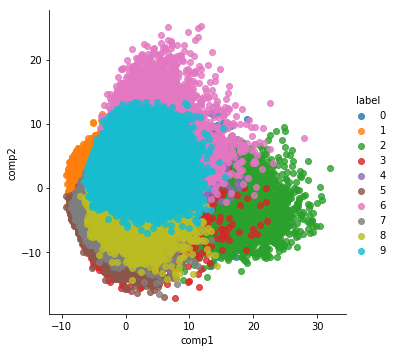

In [38]:
sns.lmplot(x='comp1', y='comp2', data=Xdf_pca_limited, hue='label', fit_reg=False)

As stated above, this is not as ideal as plotting the labels on the components found by the t-SNE, but we can still see that groups were able to be identified, even if they weren't as neatly clustered as some of the t-SNE graphs showed before.

All of this data was scaled previous to being run through PCA, t-SNE, or K-means clustering, because a lot of the algorithms assume that the data is mean 0 (or centered around zero). Also, by scaling we can help the modeling algorithms find variation and stabilize faster.

I am sure that the way I did my clustering is not as robust as it would be if I had run the same data using just what came from the t-SNE, but it does show that there were some similarities that were able to be captured by the K-means clustering method.

## 4. Hierarchical Clustering

Here, we will use hierachical clustering as a final clustering method.

Note: as I didn't take a smaller sample of the data before, I will do so here now to do the hierarchical clustering. Unfortunately, I tried running it on the full DataFrame with 50 principle components, and my computer crashed pretty hard. So, we'll see how it is able to handle HClust and a dendogram, but with a smaller dataset.

In [13]:
df_hclust = pd.DataFrame(X_pca[rows[:n_select],:])
df_hclust.head()

# Convert to numpy array for faster processing
X_hclust_array = df_hclust.values

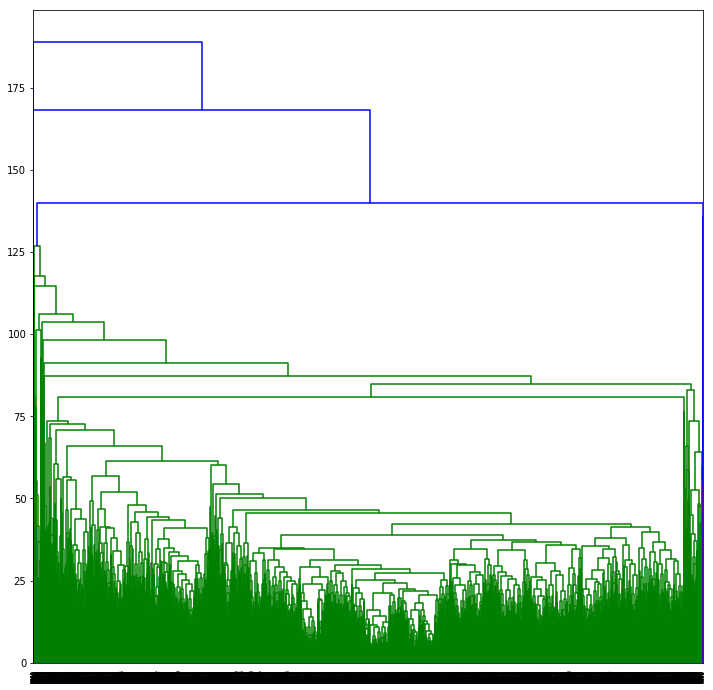

In [14]:
Z = linkage(X_hclust_array, 'complete')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

Wow, even with reducing the data down to nearly 10% of the size that it was, the dendogram is still quite difficult to read/interpret. Let's try with only 100 variables.

In [17]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 100

df_hclust = pd.DataFrame(X_pca[rows[:n_select],:])
df_hclust.head()

# Convert to numpy array for faster processing
X_hclust_array = df_hclust.values

In [20]:
Z = linkage(X_hclust_array, 'complete')

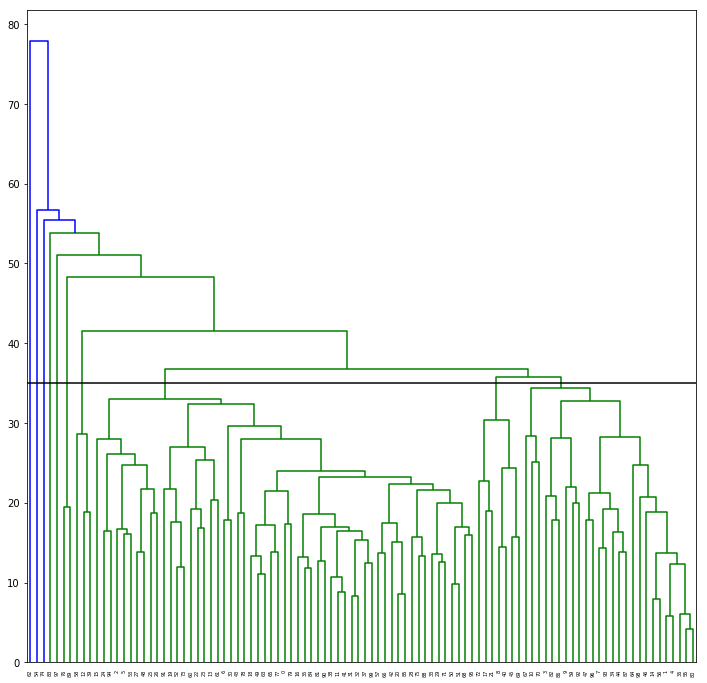

In [23]:
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.hlines(y=35, xmin=0, xmax=1000)

That's much better. We can see that there are distinct clusters, and that the diagram ends in discrete points in the tree. The line I have added to the graph shows where a given line would cross exactly ten clusters, which we know is the number of clusters in our data (digits). Without this inside knowledge, however, figuring out what the number of clusters should be would be much more subjective. So, in this case, hierarchical clustering probably isn't the best method to use, since our data aren't really nested hierarchically. Tyler said in his lecture slides (Lecture 13):
> Heirachical clustering can perform poorly relative to k-means clustering when this heirarchical assumption is not valid - for example, when clusters are not nested such that splitting large clusters into smaller ones is not accurate.

As we can see, our "hierarchical assumption" probably isn't very valid for our data. Sure, some digits will look like others (3s and 8s for example), but that doesn't mean that we could accurately model the clusters as being hierarchical.

For the sake of completeness, let's look at how the dendogram would look if we used a different linkage method than "complete". In this case, "complete" means that the hierarchical clustering uses the maximum distance between points in clusters. This is one of the more popular linkage methods, and it makes intuitive sense for how we might go about solving this problem manually. Let's try two others: average and ward.

Average uses the average distance between points in the clusters, which is similar to complete in that it cares about the distance between within-points, but doesn't try to maximize it. Let's take a look.

In [24]:
Z = linkage(X_hclust_array, 'average')

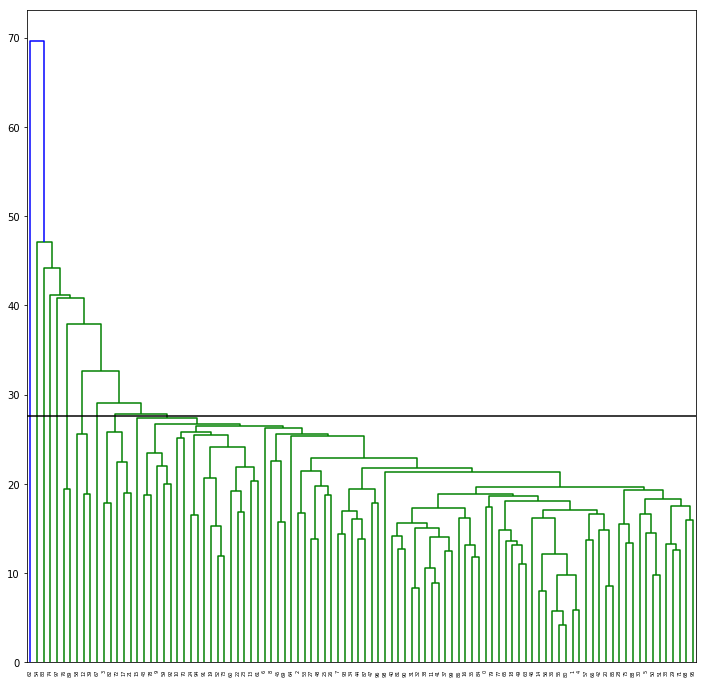

In [29]:
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.hlines(y=27.6, xmin=0, xmax=1000)

It does look quite different, especially in that the line that crosses exactly ten lines happens lower on the y axis, which means that those clusters are closer together than in the previous dendogram.

Finally, "ward" means that each joining tries to merge the two clusters which minimize the total within-cluster variance after merging. This means that we want as little variation within-cluster as possible, instead of maximizing or averaging the distance between those points. Let's see what it looks like.

In [30]:
Z = linkage(X_hclust_array, 'ward')

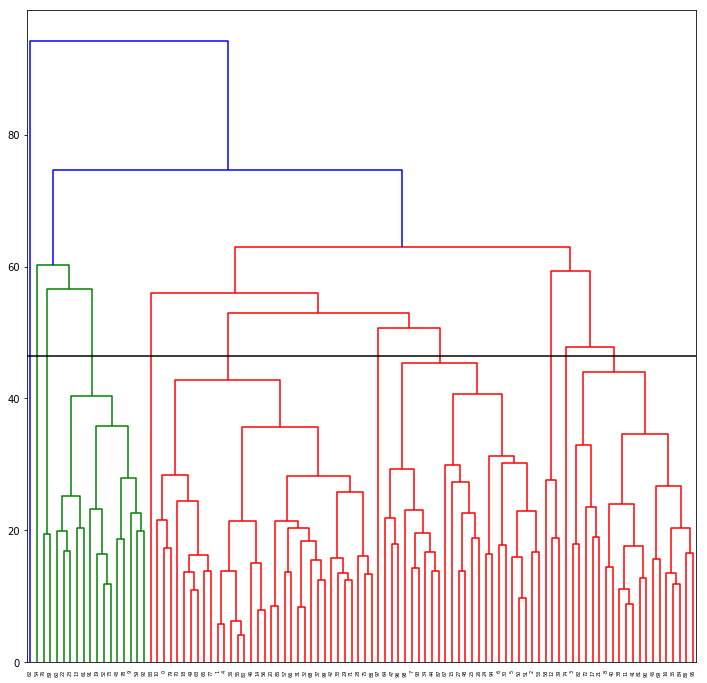

In [36]:
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.hlines(y=46.5, xmin=0, xmax=1000)

The ward method appears to break the clusters down into more distinct groups, especially into two main clusters than we can see in green and red. This still probably doesn't make the most sense for our data, but it does appear that those two main clusters are more balanced than the previous dendograms divided them into. The line shows where exactly ten clusters falls, which is a higher number than either previous dendogram (ward: 46.5, complete: 35, average: 27.6).

## Conclusion

In summary, we:
* used PCA to reduce the dimensionality of our data
* used t-SNE to further reduce the data down to two dimensions that easily visualize how the points relate to each other in its higher-dimensional space
* used K-means clustering to show an unsupervised method of trying to determine the best number of clusters that are in a dataset, and to algorithmically generate labels for an unlabeled dataset
* used hierarchical clustering (and visualized it through dendograms) to see how the data might be clustered if it were organized in hierarchical relationships

These methods, in relation to dimensionality reduction and clustering, are vitally important as the "big" in "big data" gets bigger and bigger, and allow us to gain insight from high-dimensional data that we otherwise wouldn't be able to approach with other methods, especially because the curse of dimensionality kind of ruins the awesome Euclidean or other distance measures that work so well in two dimensions.